In [1]:
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.basic_data import *

In [2]:
SZ = 64
BS = 64
NUM_WORKERS = 12

In [3]:
data = ImageDataBunch.from_folder(
    path='../traffic_sign_data/', 
    bs=BS, 
    valid_pct=0.2,
    num_workers=NUM_WORKERS,
    size=SZ, 
    resize_method=ResizeMethod.SQUISH,
    ds_tfms=(None, None)
)

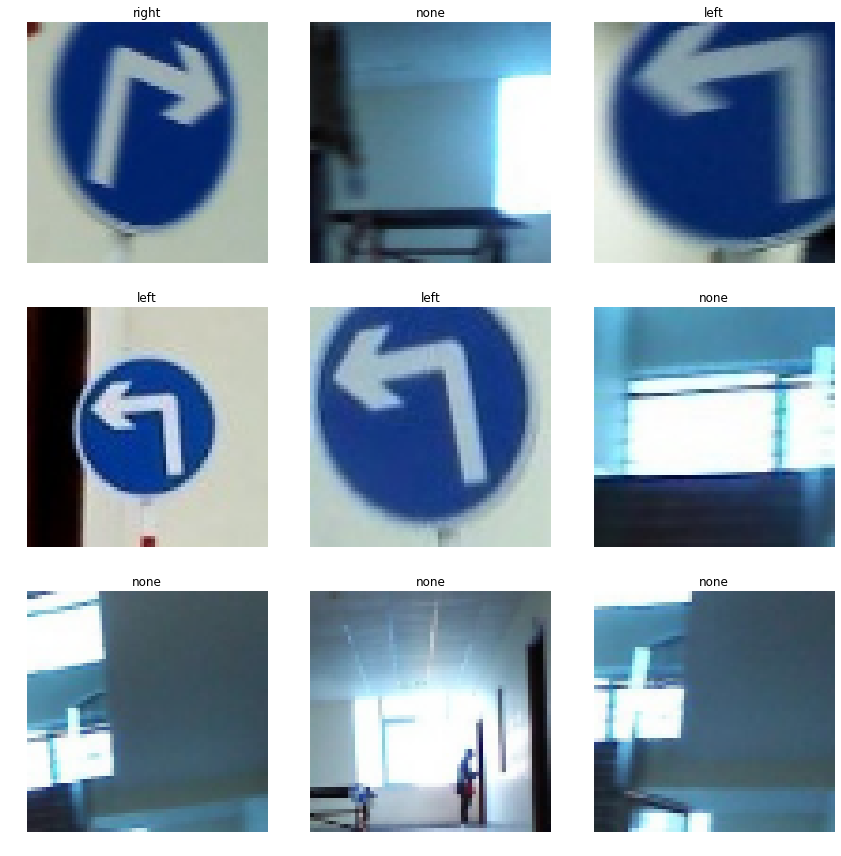

In [5]:
data.show_batch(rows=3)

In [5]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])

In [6]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.212560,0.075385,0.977059,00:25
1,0.061966,0.044710,0.987213,00:22


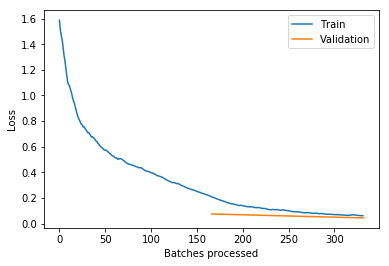

In [7]:
learn.recorder.plot_losses()

In [8]:
learn.save('/home/linus/model_notTrashCar/fast_ai/tfsign-resnet50-stage-1', with_opt=False)
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


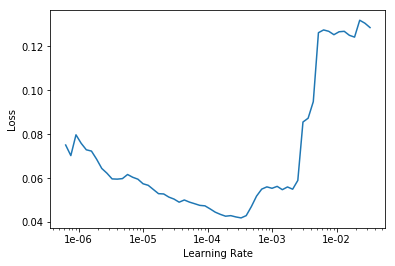

In [9]:
learn.recorder.plot()

In [12]:
max_lr = 1e-4
lrs = [max_lr/100, max_lr/10, max_lr]

In [13]:
learn.fit_one_cycle(3, lrs)

epoch,train_loss,valid_loss,accuracy,time
0,0.026218,0.022868,0.994359,00:30
1,0.012554,0.021861,0.996239,00:30
2,0.008513,0.021522,0.996615,00:30


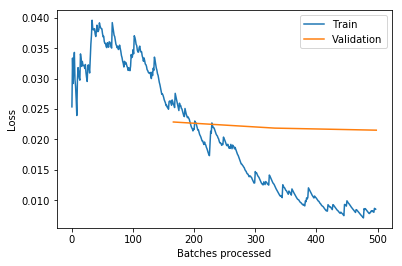

In [14]:
learn.save('/home/linus/model_notTrashCar/fast_ai/tfsign-resnet50-stage-2', with_opt=False)
learn.recorder.plot_losses()

In [6]:
data_test = ImageDataBunch.from_folder(
    path='../traffic_sign_data/', 
    bs=BS, 
    num_workers=NUM_WORKERS,
    size=SZ, 
    resize_method=ResizeMethod.SQUISH,
    ds_tfms=(None, None)
)

/home/linus/.local/lib/python3.6/site-packages/fastai/data_block.py:442: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


In [7]:
preds , y , losses = learn.predict(data_test, with_loss=True, is_test=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

NameError: name 'learn' is not defined

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused(slice_size=10)